#Task#1

In [35]:
# 1. 3x^2 - 10x + 3 = 2*3x - 10 
#                   = 6x  -  10

In [36]:
#  2. 4x^3 + x^2 - 23x + 50 = 3*4x^2 + 2x - 23 
#                           = 12x^2 + 2x - 23

In [37]:
#  3. x^4- 15x^3 + 20x^2 - 193x + 23 = 4x^3 - 3*15x^2 + 2*20x - 193 
#                                    = 4x^3 - 45x^2 +   40x   - 193

In [38]:
#  4. 10x^5 - 21x^4- x^3 + 3x^2 - 45x + 3 = 5*10x^4 - 4*21x^3 - 3x^2 + 2*3x - 45 
#                                         = 50x^4   - 84x^3   - 3x^2 + 6x  - 45

In [39]:
# 5.  3x^6 + 13x^5 - x^4- 3x^3 + 12x^2 - 33x = 6*3x^5 + 5*13x^4 - 4x^3 - 3*3x^2 + 2*12x - 33 = 
#                                            = 18x^5 +   65x^4 -  4x^3 - 9x^2 +   24x -   33

#Task#2

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
class Value:
    
    def __init__(self, data, _children=(), _op="", label=""): 
        
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other): # a + b
        return Value(self.data + other.data, (self, other), "+")
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), "*")

    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), "-")

In [5]:
def get_nodes_edges(output):
    
    nodes, edges = set(), set()

    def add_nodes_edges(node):
        
        if node not in nodes:
            nodes.add(node)
            for val in node._prev:
                edges.add((val, node))
                add_nodes_edges(val)
    
    add_nodes_edges(output)
    
    return nodes, edges

def draw_dot(output, mode = 'svg', rank = 'LR'):
    
    """
    mode: png | svg | ...
    rank: TB (top to bottom graph) | LR (left to right)
    """
    
    assert rank in ['LR', 'TB']
    nodes, edges = get_nodes_edges(output)
    dot = Digraph(format = mode, graph_attr={'rankdir': rank}) 
    
    for node in nodes:
        dot.node(name=str(id(node)), label = f"{node.label} | data: {node.data:.3f} | grad: {node.grad:.3f}", shape='record')
        if node._op:
            dot.node(name=str(id(node)) + node._op, label = node._op)
            dot.edge(str(id(node)) + node._op, str(id(node)))
    
    for val, node in edges:
        dot.edge(str(id(val)), str(id(node)) + node._op)
    
    return dot


##1. a = 3, b = -1, c = 4; e = a + b; d = e - c



In [6]:
a = Value(3., label = 'a')
# print(a.label)
b = Value(-1., label = 'b')
c = Value(4., label = 'c')
e = a + b; e.label = 'e'
d = e - c; d.label = 'd'
d.grad

0

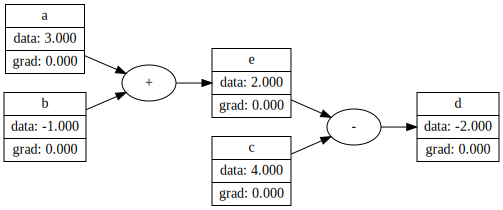

In [8]:
draw_dot(d)

In [9]:
d.grad = 1

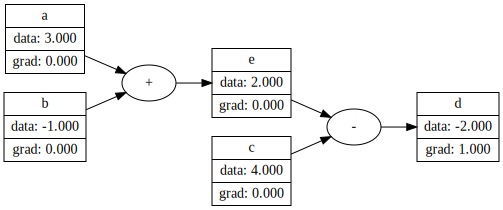

In [10]:
draw_dot(d)

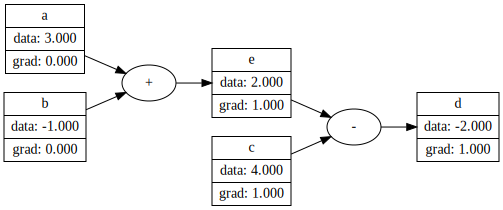

In [11]:
c.grad = 1 * d.grad
e.grad = 1 * d.grad
draw_dot(d)

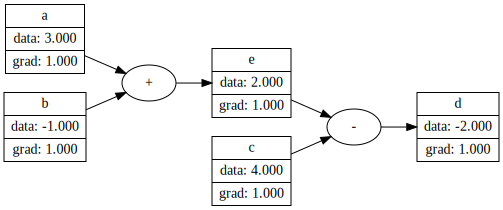

In [12]:
a.grad = 1 * e.grad
b.grad = 1 * e.grad
draw_dot(d)

##2. a = -2, b = 3, c = -4, d = -3; e = a - b; f = c + e; g = f - d

In [17]:
a = Value(-2., label = 'a')
b = Value(3., label = 'b')
c = Value(-4., label = 'c')
d = Value(-3., label = 'd')
e = a - b; e.label = 'e'
f = c + e; f.label = 'f'
g = f - d; g.label = 'g'
g.grad

0

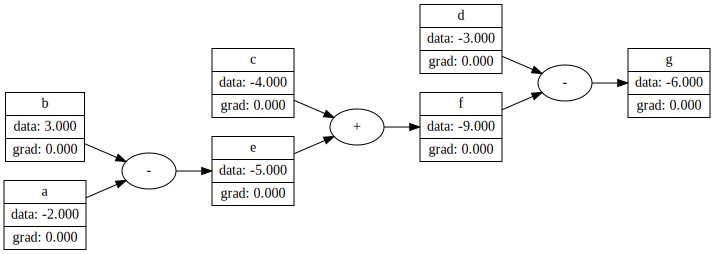

In [20]:
draw_dot(g)

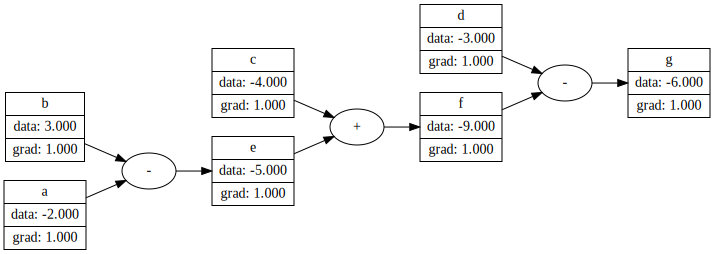

In [21]:
g.grad = 1
d.grad = 1 * g.grad
f.grad = 1 * g.grad
c.grad = 1 * f.grad
e.grad = 1 * f.grad
b.grad = 1 * e.grad
a.grad = 1 * e.grad

draw_dot(g)

##3. a = -1, b = 4, c = -1, d = -2; e = a * b; f = c - e; g = f + d

In [22]:
a = Value(-1., label = 'a')
b = Value(4., label = 'b')
c = Value(-1., label = 'c')
d = Value(-2., label = 'd')
e = a * b; e.label = 'e'
f = c - e; f.label = 'f'
g = f + d; g.label = 'g'
g.grad

0

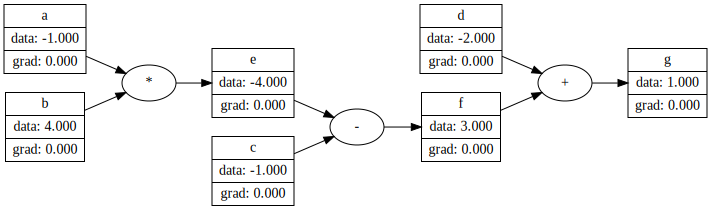

In [23]:
draw_dot(g)

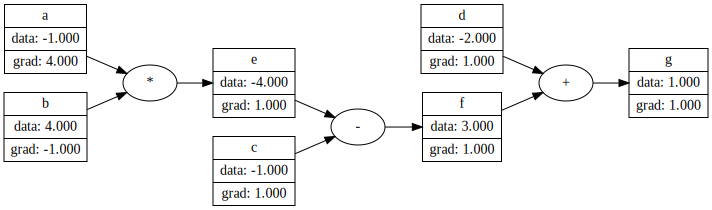

In [24]:
g.grad = 1
d.grad = 1 * g.grad
f.grad = 1 * g.grad
e.grad = 1 * f.grad
c.grad = 1 * f.grad
b.grad = a.data * e.grad
a.grad = b.data * e.grad

draw_dot(g)

##4. a = 3, b = 0, c = -2, d = 4; e = a - b; f = c * e;   g = f - d

In [26]:
a = Value(3., label = 'a')
b = Value(0., label = 'b')
c = Value(-2., label = 'c')
d = Value(4., label = 'd')
e = a - b; e.label = 'e'
f = c * e; f.label = 'f'
g = f - d; g.label = 'g'
g.grad

0

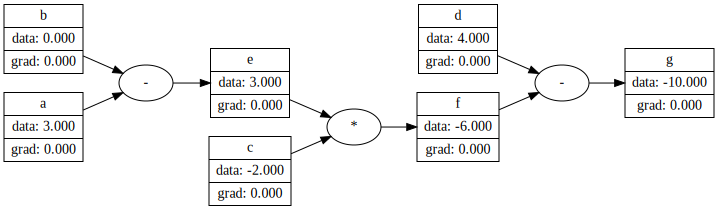

In [27]:
draw_dot(g)

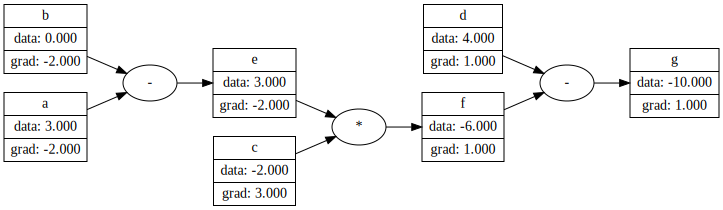

In [28]:
g.grad = 1
d.grad = 1 * g.grad
f.grad = 1 * g.grad
e.grad = c.data * f.grad
c.grad = e.data * f.grad
b.grad = 1 * e.grad
a.grad = 1 * e.grad

draw_dot(g)

##5. a = 5, b = 1, c = 3, d = 0; e = a * b; f = c * e;   g = f - d

In [29]:
a = Value(5., label = 'a')
b = Value(1., label = 'b')
c = Value(3., label = 'c')
d = Value(0., label = 'd')
e = a * b; e.label = 'e'
f = c * e; f.label = 'f'
g = f - d; g.label = 'g'
g.grad

0

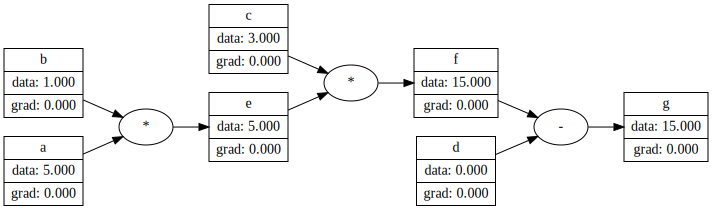

In [30]:
draw_dot(g)

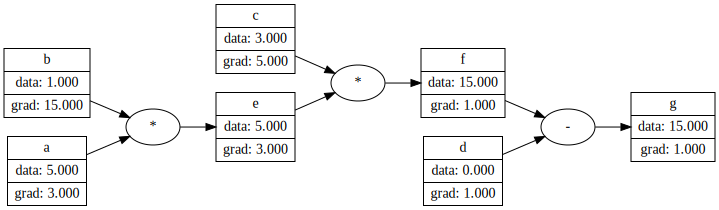

In [31]:
g.grad = 1
d.grad = 1 * g.grad
f.grad = 1 * g.grad
e.grad = c.data * f.grad
c.grad = e.data * f.grad
b.grad = a.data * e.grad
a.grad = b.data * e.grad

draw_dot(g)